<a href="https://colab.research.google.com/github/Rupeshh03/Computer-vision/blob/main/CV_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import cv2

Text(0.5, 1.0, 'Input Image 2')

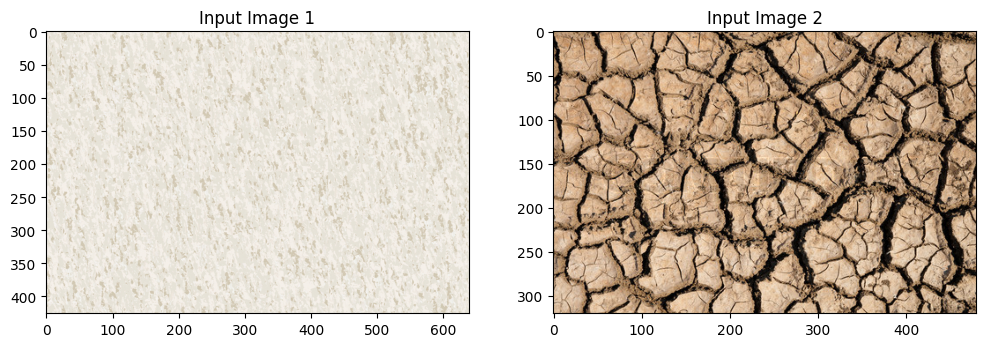

In [2]:
url_1 = "https://i.ibb.co/Kxbc9RQ/Whats-App-Image-2024-01-25-at-10-32-53-PM-1.jpg"
url_2 = "https://i.ibb.co/V2pqZSL/Whats-App-Image-2024-01-25-at-10-32-53-PM.jpg"

image_1 = io.imread(url_1)
image_2 = io.imread(url_2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("Input Image 1")

plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.title("Input Image 2")


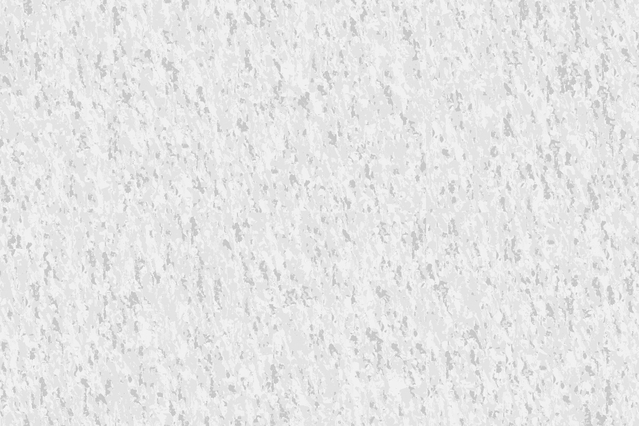

In [14]:
# Convert image_1 to grayscale
imgGray_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
cv2_imshow(imgGray_1)

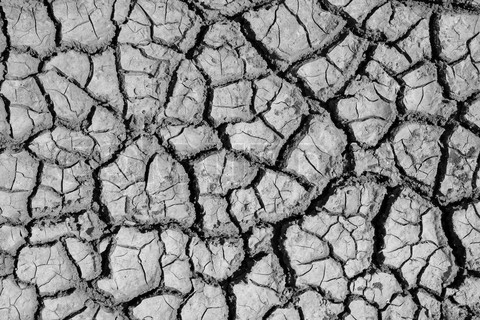

In [15]:
#converting image_2 to grayscale format

imgGray_2 = cv.cvtColor(image_2, cv.COLOR_RGB2GRAY)
cv2_imshow(imgGray_2)

In [16]:
def compare_values(image, center_value, x, y):
    new_center_value = 1 if (x < image.shape[0] and y < image.shape[1] and image[x, y] >= center_value) else 0
    return new_center_value


In [17]:

def get_LBP(image, x, y):
    center = image[x, y]
    binary_array = [

        #top value
        compare_values(image, center, x - 1, y),
        #top left value
        compare_values(image, center, x - 1, y - 1),
        #top right value
        compare_values(image, center, x - 1, y + 1),

        #left value
        compare_values(image, center, x, y - 1),
        #right value
        compare_values(image, center, x, y + 1),

        #bottom value
        compare_values(image, center, x + 1, y),
        #bottom left value
        compare_values(image, center, x + 1, y - 1),
        #bottom right value
        compare_values(image, center, x + 1, y + 1)
    ]

    value = sum(bit * (2 ** i) for i, bit in enumerate(binary_array))

    return value

In [18]:
def show_LBP_image(image, gray_image):
    height, width, _ = image.shape
    img_lbp = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            img_lbp[i, j] = get_LBP(gray_image, i, j)

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    # Display LBP image
    plt.subplot(1, 2, 2)
    plt.imshow(img_lbp, cmap="gray")
    plt.title("LBP Image")

    plt.show()

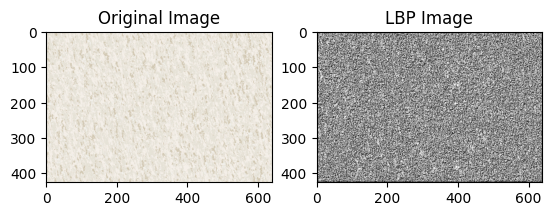

In [19]:

show_LBP_image(image_1, imgGray_1)